# TP 5.1 : Classification avec R

## 1. Données `body` allégées

Nous considérons une nouvelles fois les données `body`.

In [1]:
data_body <- read.table("data/body.csv", header=TRUE, sep=";", dec=",", row.names=1)

### 1.1 Classification ascendante hiérarchique

Grâce à la fonction `dist()`, il est possible de calculer les distances euclidiennes entre toutes les paires d'individus.

In [10]:
distances <- dist(data_body)


<div class="alert alert-block alert-success">
    Quelle est la longueur de l'objet créé ? À quoi correspond cette valeur ?
</div>

La fonction `hclust()` permet de mettre en oeuvre une classification ascendante hiérarchique à partir de l'objet `distances` et le dendrogramme correspondant s'affiche avec `plot()`.

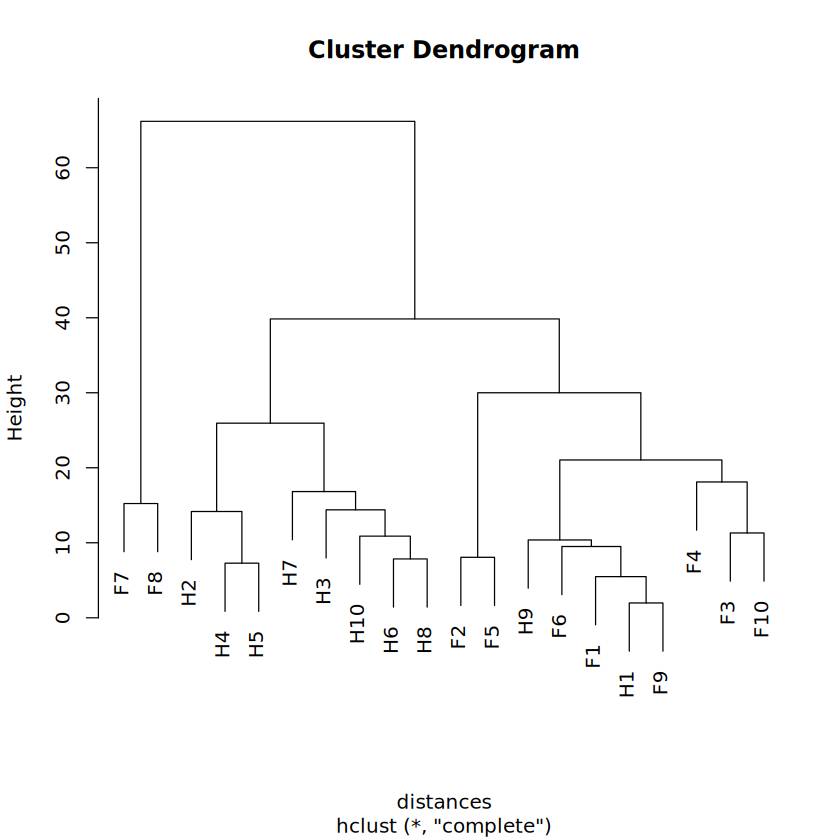

In [ ]:
cah_body <- hclust(distances)
par(bg = "white")
plot(cah_body)


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Quel critère d'agglomération est utilisé par défaut par la fonction <code>hclust()</code> ?</li>
        <li>Mettre en oeuvre une classification ascendante hiérarchique en utilisant le critère de Ward comme critère d'agglomération.</li>
        <li>Représenter le dendrogramme associé aux résultats de cette classification.</li>
        <li>En utilisant <code>cah_body&dollar;height</code>, proposer un nombre de groupes raisonnable pour répartir les individus ?</li>
        <li>Utiliser la fonction <code>cutree()</code> avec le nombre de groupes souhaités pour associer chaque individu à un groupe. Les groupes peuvent être visualisés sur le dendrogramme en utilisant la fonction <code>rect.hclust()</code> et l'option <code>border=</code> pour les couleurs.<br>
            <center><img src="img/cah_body.png"></center></li>
        <li>Calculer une ACP des données <code>body</code> et représenter les individus dans le plan principal en donnant une couleur identique aux individus d'un même groupe de votre classification.<br>
            <center><img src="img/cah_acp_body.png"></center></li>
    </ol>
</div>

1 - C'est le maximum (complete linkage)
4 - 4 groupes c'est bien (11 éléments)

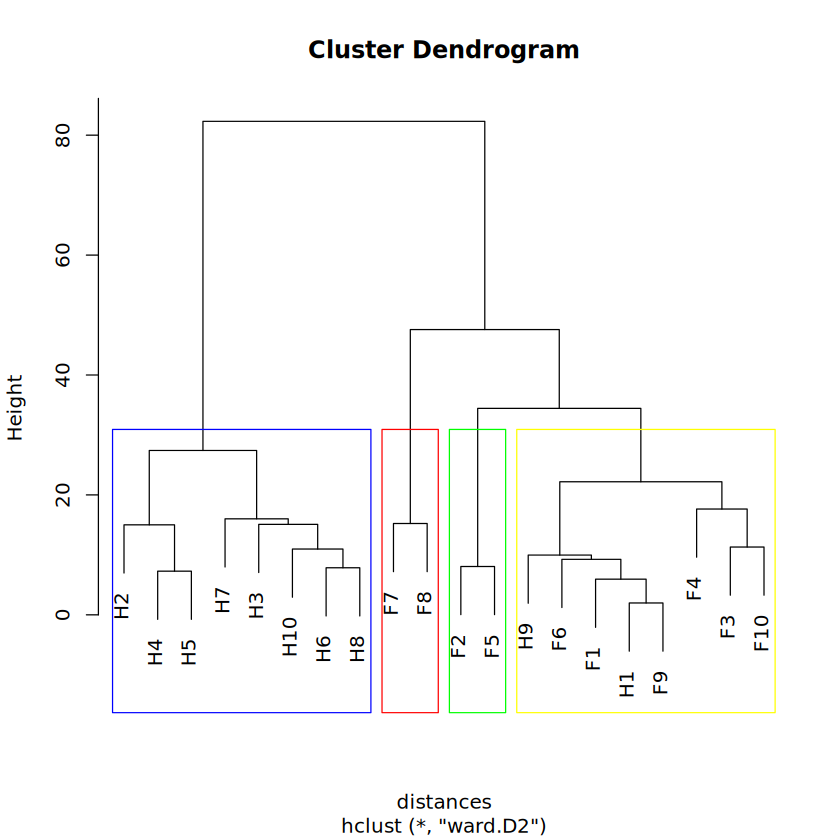

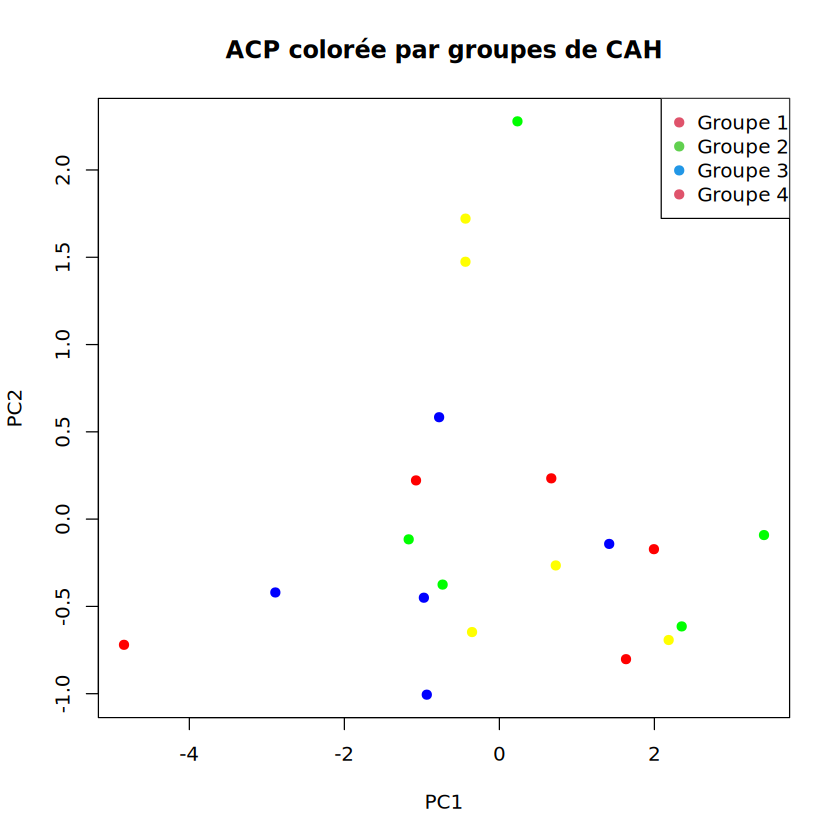

In [73]:
#help(hclust)
cah_body_w <- hclust(d = distances, method = "ward.D2")
par(bg  = "white")
#cah_body$height
#help(rect.hclust)
cut = cutree(tree = cah_body_w, k = 4)
plot(cah_body_w)
rect.hclust(cah_body_w,4, border = c('blue', 'red','green','yellow'))

# 6 - ACP

acp_body <- prcomp(data_body, scale. = TRUE)

par(bg = "white")
plot(acp_body$x[,1], acp_body$x[,2],
    col=c('blue', 'red','green','yellow'), pch=19,
    xlab="PC1", ylab="PC2",
    main="ACP colorée par groupes de CAH")
legend("topright", legend=paste("Groupe", 1:4), col=2:4, pch=19)

### 1.2 K-means

Pour réaliser un algorithme K-means, il est possible d'utiliser la fonction `kmeans()` avec l'option `centers=` pour définir un nombre entier de groupes.

In [107]:
# Exemple de K-means à 4 groupes
kmeans_body_1 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le premier K-means :\n")
print(kmeans_body_1$cluster)

# Un autre exemple de K-means à 4 groupes
kmeans_body_2 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le second K-means :\n")
print(kmeans_body_2$cluster)

Groupes des individus pour le premier K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  3   3   4   4   4   4   4   4   3   4   3   2   3   3   2   3   1   1   3   2 
Groupes des individus pour le second K-means :


 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  2   2   3   3   3   3   3   3   2   3   2   1   2   2   1   2   4   4   2   1 


<div class="alert alert-block alert-success">
    Expliquer pourquoi les résultats obtenus sont différents.
    --> Cela dépend du premier centre choisi donc ça évolue de manières différentes
</div>

Il est possible de construire la table de contingence qui croise les effectifs des 4 groupes obtenus dans les 2 cas avec la fonction `table()`.

In [ ]:
tablek <- table(kmeans_body_1$cluster, kmeans_body_2$cluster, dnn=c("kmeans1", "kmeans2"))
dim(tablek)


[1] 4 4

<div class="alert alert-block alert-success">
    Croiser également l'un des résultats obtenus avec les groupes issus de la classification ascendante hiérarchique.
</div>

Afin de pallier l'aspect aléatoire de l'algorithme K-means et de stabiliser le résultat d'une classification ascendante hiérarchique, nous pouvons imposer les centres initiaux du K-means comme étant ceux donnés par les groupes de la CAH.

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer les barycentres des classes issues de la classification hiérarchique ascendante et stocker ces résultats en ligne dans une matrice à 5 colonnes.</li>
        <li>Passer cette matrice à l'option <code>centers=</code> de la fonction <code>kmeans()</code>. Est-ce que le résultat est encore aléatoire ?</li>
        <li>Comparer les résultats de cette classification avec ceux de la classification ascendante hiérarchique sous forme d'une table puis sous forme graphique dans le plan principal.</li>
    </ol>
</div>

In [145]:
# À FAIRE
#table(cut)
barycentre <- aggregate(data_body, by = list(classe = cut), FUN = mean)

mat_bary <- as.matrix(barycentre[,-1])

k_bary <- kmeans(data_body, centers = mat_bary)
cat("Groupes des individus pour le bary K-means :\n")
print(k_bary$cluster) # Ce n'est plus aléatoire

tablek_bary <- table(kmeans_body_1$cluster, k_bary$cluster, dnn=c("kmeans1", "k_bary"))

tablek_bary
table1

'
par(bg = "white")
# Graphique CAH
plot(acp_body$x[,1], acp_body$x[,2], col=cut, pch=19,
     main="CAH sur le plan principal",
     xlab="PC1", ylab="PC2")

# Graphique K-means
plot(acp_body$x[,1], acp_body$x[,2], col=k_bary$cluster, pch=19,
     main="K-means sur le plan principal",
     xlab="PC1", ylab="PC2")
'

Groupes des individus pour le bary K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   3   1   1   3   1   4   4   1   3 


       k_bary
kmeans1 1 2 3 4
      1 0 0 0 2
      2 0 0 3 0
      3 8 0 0 0
      4 0 7 0 0

       kmeans2
kmeans1 1 2 3 4
      1 0 5 0 0
      2 4 0 0 0
      3 0 0 7 0
      4 0 0 0 4

[1] "\npar(bg = \"white\")\n# Graphique CAH\nplot(acp_body$x[,1], acp_body$x[,2], col=cut, pch=19,\n     main=\"CAH sur le plan principal\",\n     xlab=\"PC1\", ylab=\"PC2\")\n\n# Graphique K-means\nplot(acp_body$x[,1], acp_body$x[,2], col=k_bary$cluster, pch=19,\n     main=\"K-means sur le plan principal\",\n     xlab=\"PC1\", ylab=\"PC2\")\n"

## 2. Données `body` complètes

Les données sont consituées de 24 variables quantitatives (diamètres, circonférence, âge, taille, poids, ...) mesurées chez 507 individus hommes et femmes (le sexe étant précisé dans la variable `gender`).

In [129]:
data_body_full <- read.table("data/data-body.csv", sep=";", dec=",", header=TRUE)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification ascendante hiérarchique (distance euclidienne et critère de Ward) sur les individus et représenter le dendrogramme associé.</li>
        <li>En combien de groupes classeriez-vous les individus ?</li>
        <li>Comparer les groupes de la classification à la variable <code>gender</code> à l'aide d'une table.</li>
        <li>Proposer plusieurs façons de caractériser chacun des groupes de la classification (individus moyens par groupe, ACP, ...).</li>
    </ol>
</div>

In [190]:
# À FAIRE
dist_fb <- dist(data_body_full)
cah_fb_eucl <- hclust(dist_fb)
cah_fb_ward <- hclust(dist_fb, method = "ward.D2")
par(bg = "white")
'
plot(cah_fb_eucl)
plot(cah_fb_ward)
'
'
length(cah_fb_ward$height)

plot(cah_fb_ward$height)
'
# on va découper en 3 groupes



# -----------------------------
# 1. Sélection des colonnes numériques
# -----------------------------
X <- data_body_full[, sapply(data_body_full, is.numeric)]

# -----------------------------
# 2. Distance et CAH
# -----------------------------
d <- dist(X)
cah_fb_ward <- hclust(d, method = "ward.D2")

# -----------------------------
# 3. Découpage en k=3 classes
# -----------------------------
cut_fb <- cutree(cah_fb_ward, k = 3)

# -----------------------------
# 4. Calcul des barycentres pour K-means
# -----------------------------
bary_fb <- aggregate(X, by = list(cluster = cut_fb), FUN = mean)
mat_bary <- as.matrix(bary_fb[,-1])  # enlever la colonne "cluster"

# -----------------------------
# 5. K-means avec centres initiaux
# -----------------------------
k_fb <- kmeans(X, centers = mat_bary, nstart = 1)

# -----------------------------
# 6. Comparaison avec gender
# -----------------------------
cat("Table de contingence K-means vs gender:\n")
table(Kmeans = k_fb$cluster, Gender = data_body_full$gender)


Warning message in dist(data_body_full):
“NAs introduced by coercion”


[1] "\nplot(cah_fb_eucl)\nplot(cah_fb_ward)\n"

[1] "\nlength(cah_fb_ward$height)\n\nplot(cah_fb_ward$height)\n"

Table de contingence K-means vs gender:


      Gender
Kmeans   F   M
     1  68 114
     2  12 122
     3 180  11